In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import models
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [3]:
size = [224,224]
train_route = "/content/gdrive/My Drive/Colab Notebooks/Datasets/X_ray/Datasets/chest_xray/train"
test_route = "/content/gdrive/My Drive/Colab Notebooks/Datasets/X_ray/Datasets/chest_xray/test"

In [4]:
vgg_model = VGG19(input_shape=size+[3],weights='imagenet',include_top=False)

80142336/80134624 [==============================] - 4s 0us/step


In [5]:
for layer in vgg_model.layers:
    layer.trainable = False

In [6]:
vgg_model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [7]:
x = layers.Flatten()(vgg_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.3)(x)
x = layers.Dense(64, activation='relu')(x)
x = layers.Dropout(0.25)(x)
x = layers.Dense(2, activation='softmax')(x)
model = keras.models.Model(vgg_model.input, x)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
optm = opt = keras.optimizers.Adam(learning_rate=0.0001)

In [10]:
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])

In [11]:
train_generator = ImageDataGenerator(rescale=1/255.0,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True)

In [12]:
test_generator = ImageDataGenerator(rescale=1/255.0)

In [13]:
training_set = train_generator.flow_from_directory(train_route,
                                                   target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5220 images belonging to 2 classes.


In [14]:
testing_set = test_generator.flow_from_directory(test_route,
                                                target_size=(224,224),batch_size=32,class_mode='categorical')

Found 625 images belonging to 2 classes.


In [15]:
len(training_set)

164

In [16]:
len(testing_set)

20

In [17]:
Model_chk = ModelCheckpoint('The_Best_model.h5',monitor='val_accuracy',save_best_only=True,mode='max')

In [18]:
Early_stp = EarlyStopping(patience = 5,
                          restore_best_weights = True,monitor='val_loss')

In [19]:
start = model.fit(training_set,validation_data=testing_set,
                            epochs=100,steps_per_epoch=163,
                            validation_steps=20,callbacks = [Early_stp,Model_chk])

Epoch 1/100
163/163 [==============================] - 3218s 20s/step - loss: 0.3572 - accuracy: 0.8342 - val_loss: 0.3097 - val_accuracy: 0.8752
Epoch 2/100
163/163 [==============================] - 135s 828ms/step - loss: 0.1860 - accuracy: 0.9250 - val_loss: 0.4781 - val_accuracy: 0.8064
Epoch 3/100
163/163 [==============================] - 135s 827ms/step - loss: 0.1684 - accuracy: 0.9336 - val_loss: 0.3843 - val_accuracy: 0.8784
Epoch 4/100
163/163 [==============================] - 134s 823ms/step - loss: 0.1604 - accuracy: 0.9368 - val_loss: 0.3819 - val_accuracy: 0.8832
Epoch 5/100
163/163 [==============================] - 136s 831ms/step - loss: 0.1142 - accuracy: 0.9609 - val_loss: 0.3566 - val_accuracy: 0.8736
Epoch 6/100
163/163 [==============================] - 134s 824ms/step - loss: 0.1328 - accuracy: 0.9560 - val_loss: 0.3599 - val_accuracy: 0.8944


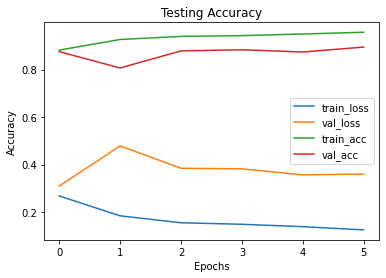

In [20]:
plt.figure()
plt.plot(start.history["loss"], label="train_loss")
plt.plot(start.history["val_loss"], label="val_loss")
plt.plot(start.history["accuracy"], label="train_acc")
plt.plot(start.history["val_accuracy"], label="val_acc")
plt.title("Testing Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [21]:
plt.savefig("/content/gdrive/My Drive/Colab Notebooks/VGG19(100).png")
model.save('/content/gdrive/My Drive/Colab Notebooks/Best_model.h5')

<Figure size 432x288 with 0 Axes>